In [1]:
import topogenesis as tg
import numpy as np
import pyvista as pv
from time import sleep

In [2]:
# create a step one moore neighbourhood
s = tg.create_stencil("moore", 1)

# set the center to 0
s.set_index([0, 0, 0], 0)

# assign the sum function
s.function = tg.sfunc.sum  # np.sum

print(s)

[[[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 0 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]]]


In [3]:
# initiate the lattice
size = 1
l = tg.lattice([[0, -size, -size], [0, size, size]], default_value=0, dtype=int)
l[0, :, size] = 1

print(l)

[[[0 1 0]
  [0 1 0]
  [0 1 0]]]


In [4]:
# initiating the plotter
p = pv.Plotter()

# fast visualization of the lattice
l.fast_vis(p)

# setup camera and close
p.set_position([10,0,0])
p.reset_camera()

# Open a gif
p.open_gif("CA.gif")

# main iteration forloop
for i in range(2):

    # apply the stencil on the lattice
    neighbor_sum = l.apply_stencil(s)

    # apply cellular automata rules
    ######
    # turn off if less than 2 or more than 3
    l *= (neighbor_sum >= 2) * (neighbor_sum <= 3)

    # turn on if 3 neighbours are on
    l[(neighbor_sum == 3)] = 1

    # update the plot
    ######
    p.clear()
    l.fast_vis(p)

    # this will trigger the render
    p.write_frame()

# Close movie and delete object
p.close()

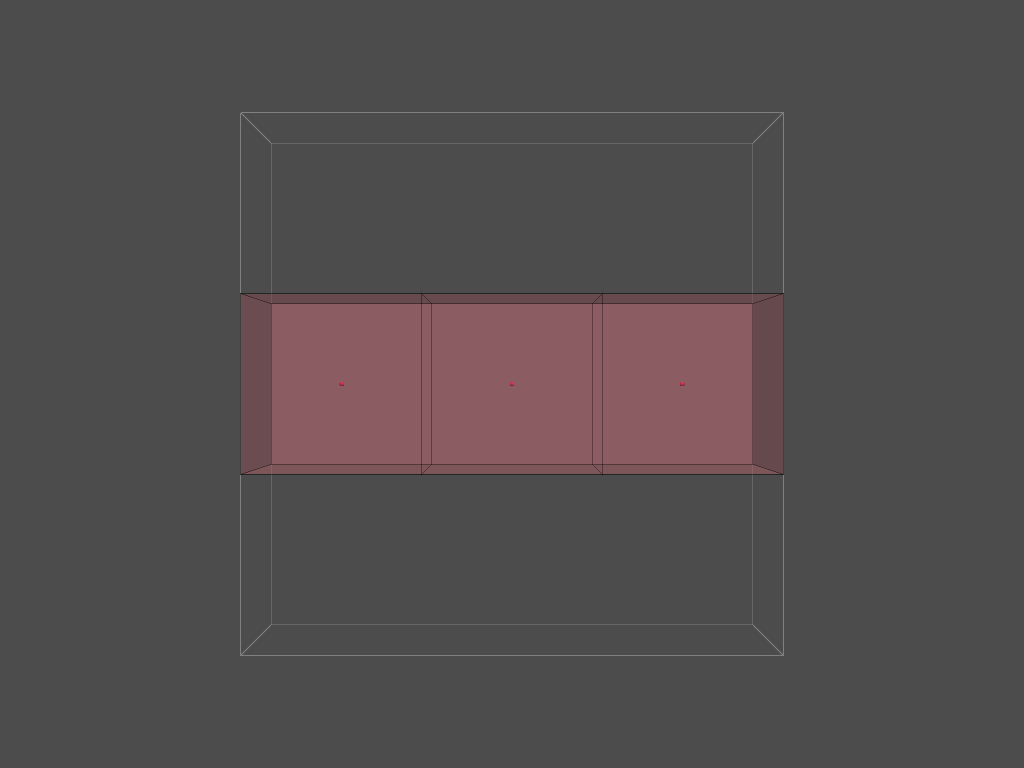

In [5]:
from IPython.display import Image
Image(filename="CA.gif")